In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [51]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [56]:
y=train.Survived

In [57]:
X=train.drop(["Survived","Name","Ticket","PassengerId"],axis=1)
X_test=test.drop(["Name","Ticket","PassengerId"],axis=1)

In [58]:
X["Cabin"] = X["Cabin"].astype(str).apply(lambda a: a[0])
X_test["Cabin"] = X_test["Cabin"].astype(str).apply(lambda a: a[0])

In [59]:
X["Cabin"] = X["Cabin"].replace("n",np.nan)
X_test["Cabin"] = X_test["Cabin"].replace("n",np.nan)

In [60]:
X["Embarked"] = X["Embarked"].astype("category")
X["Cabin"] = X["Cabin"].astype("category")
X["Sex"] =X["Sex"].astype("category")

X_test["Embarked"] = X_test["Embarked"].astype("category")
X_test["Cabin"] = X_test["Cabin"].astype("category")
X_test["Sex"] =X_test["Sex"].astype("category")

In [61]:
X = pd.get_dummies(X,prefix="Category_",columns=["Embarked","Sex","Cabin"])
X_test=pd.get_dummies(X_test,prefix="Category_", columns=["Embarked","Sex","Cabin"])

In [66]:
X = X.fillna(-999)
X_test=X_test.fillna(-999)

In [69]:
X_test["Category_T"]=0

In [71]:
train_X,val_X,train_y,val_y=train_test_split(X.as_matrix(),y.as_matrix(),test_size=0.2,random_state=0)

In [106]:
from xgboost import XGBClassifier
my_model=XGBClassifier(n_estimators=500,learning_rate=0.05)
my_model.fit(train_X,train_y,early_stopping_rounds=20,eval_set=[(val_X,val_y)],verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
my_predictions=my_model.predict(val_X)

In [108]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold=model_selection.KFold(n_splits=10,random_state=7)
modelCV=XGBClassifier()
scoring="accuracy"
results= model_selection.cross_val_score(modelCV,train_X,train_y,scoring=scoring,cv=kfold)

In [109]:
results

array([ 0.83333333,  0.80555556,  0.83098592,  0.81690141,  0.83098592,
        0.85915493,  0.84507042,  0.81690141,  0.85915493,  0.78873239])

In [110]:
results.mean()

0.82867762128325517

In [113]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [114]:
metrics.accuracy_score(val_y,my_predictions)

0.8044692737430168

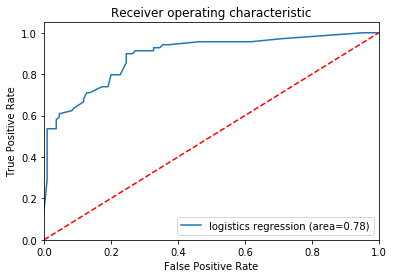

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(val_y,my_predictions)
fpr,tpr,thresholds=roc_curve(val_y,my_model.predict_proba(val_X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="logistics regression (area=%0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [120]:
predictions=my_model.predict(X_test.as_matrix())

In [121]:
my_submission=pd.DataFrame({"PassengerId":test.PassengerId,"Survived":predictions})

In [122]:
my_submission.to_csv("submission_3.csv",index=False)